In [ ]:
pip install plotly==4.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 5.5 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=8ef4b7629714fee3ea35c64da2238da4ca19dece937cc37939085f42118a4dc4
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 4.1.0 which is incompatible.


In [ ]:
#importando bibliotecas necessárias
import plotly.graph_objects as go
import pandas as pd
import numpy as np

#Importando os dados

In [ ]:
#importando os dados
base_dados = pd.read_csv('Wine.csv')
base_dados.shape

(178, 14)

Nosso conjunto de dados tem 178 linhas e 14 colunas.

In [ ]:
base_dados.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


#Analisando os dados de entrada

A seguinte célula traz um resumo estatístico sobre as variáveis do conjunto de dados.

In [ ]:
base_dados.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


A partir dos resumos estatísticos, é possível verificar que os dados estão em escalas diferentes, apresentando grande variabilidade. Para utilização em modelos de aprendizado de máquina e clusterização, é necessários que os dados passem por um tratamento de normalização.

Analisando a correlação entre as variáveis, temos:

In [ ]:
base_dados.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [ ]:
import matplotlib.pyplot as plt

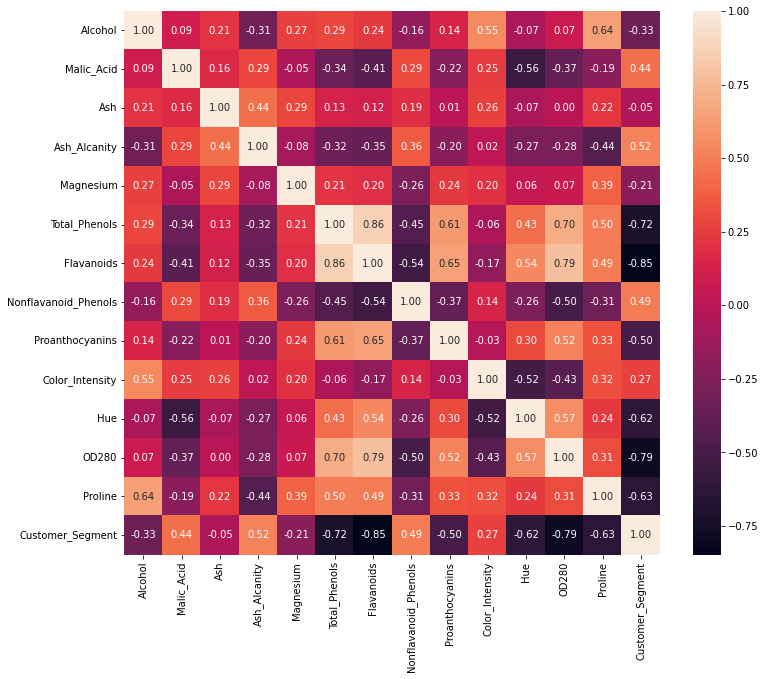

In [ ]:
import seaborn as sns
plt.figure(figsize = (12,10))
sns.heatmap(base_dados.corr(), annot = True, fmt = '.2f')

A partir da visualização da matriz de correlação, podemos identificar quais variáveis são altamente correlacionadas entre si e selecionar os atributos que devem ser removidos. Variáveis altamente correlacionadas representam redundância e podem ser removidas para reduzir a quantidade de atributos utilizados.

#Normalização manual dos dados

Como vimos anteriormente, todos os atributos estão em escalas diferentes. Tal situação pode prejudicar o processo de mineração de dados, para resolver isso podemos aplicar duas formas de normalização: normalização manual e normalização a partir da biblioteca sklearn.

Normalizando os dados, temos:

In [ ]:
#normalizando os dados a partir da técnica min max scaler
atributos = base_dados.columns

for atributo in atributos:
  base_dados[atributo] = (base_dados[atributo] - min(base_dados[atributo]))/(max(base_dados[atributo]) - min(base_dados[atributo]))

In [ ]:
base_dados.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0
5,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949,0.0
6,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826,0.0
7,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392,0.0
8,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076,0.0
9,0.744737,0.120553,0.486631,0.278351,0.304348,0.689655,0.592827,0.169811,0.454259,0.506826,0.430894,0.835165,0.547076,0.0


In [ ]:
base_dados.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


A partir da normalização, todos os dados da base de dados estão variando de 0-1, na mesma escala.

#Normalização MinMaxScaler com o sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
np_base_dados = min_max_scaler.fit_transform(base_dados)

In [ ]:
#transformando o numpy array obtido em um dataframe
base_dados = pd.DataFrame(np_base_dados, columns = base_dados.columns)
base_dados.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0
5,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949,0.0
6,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826,0.0
7,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392,0.0
8,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076,0.0
9,0.744737,0.120553,0.486631,0.278351,0.304348,0.689655,0.592827,0.169811,0.454259,0.506826,0.430894,0.835165,0.547076,0.0


In [ ]:
#visualizando o resumi estatístico dos dados normalizados:
base_dados.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Normalização com o StandarScaler do SKLEARN

Outra forma de normalizar os dados é utilizando a ferramenta StandardScaler da biblioteca sklearn. Essa ferramenta normaliza os dados subtraindo dos atributos a média de cada um e dividindo pelo desvio padrão.

In [ ]:
base_dados = pd.read_csv('Wine.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standard_scaler = StandardScaler()
np_base_dados = standard_scaler.fit_transform(base_dados)
base_dados = pd.DataFrame(np_base_dados, columns = base_dados.columns)

base_dados.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039,-1.213944
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520,-1.213944
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442,-1.213944
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319,-1.213944
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319,-1.213944


#Clusterizando com KMeans e visualizando os agrupamentos

In [ ]:
from sklearn.cluster import KMeans

Abrindo o conjunto de dados originais, temos:

In [ ]:
base_dados = pd.read_csv('Wine.csv')
base_dados.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Vamos utilizar 4 grupos de clusterização, que nesse caso representam os diferentes tipos de consumidores.

In [ ]:
agrupador = KMeans(n_clusters = 4)
agrupador.fit(base_dados)

KMeans(n_clusters=4)

In [ ]:
labels = agrupador.labels_
print(labels)

[3 3 1 1 0 1 1 1 3 3 1 1 1 3 1 1 1 3 1 0 0 0 3 3 0 0 1 1 3 3 1 1 3 1 3 3 3
 3 3 0 0 3 3 0 3 3 3 3 3 1 3 1 1 1 3 3 3 1 1 2 0 2 0 2 2 0 2 2 0 0 3 2 2 3
 3 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 3 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 2 2 0 0 0 0 2 0 0 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 3 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


Gerando uma visualização dos grupos em duas dimensões

Para gerar uma visualização em duas dimensões, precisamos utilizar dois atributos. O máximo que conseguimos visualizar é através de uma visualização em três dimensões, com o uso de três atributos.

In [ ]:
#Visualizando os quatro agrupamentos gerados, temos:
fig = go.Figure()
fig.add_trace(go.Scatter(x = base_dados['Color_Intensity'], y = base_dados['Alcohol'],
                         mode = 'markers',
                         marker = dict(color = agrupador.labels_),
                         text = labels))
fig.show()

Os dados acima não ficaram muito separados, como podemos ver na visualização acima. Podemos reduzir a quantidade de grupos de cluster para verificar se obtemos uma visualização melhor dos diferentes grupos.

In [ ]:
agrupador = KMeans(n_clusters = 3)
agrupador.fit(base_dados)

labels = agrupador.labels_

#Visualizando os quatro agrupamentos gerados, temos:
fig = go.Figure()
fig.add_trace(go.Scatter(x = base_dados['Color_Intensity'], y = base_dados['Alcohol'],
                         mode = 'markers',
                         marker = dict(color = agrupador.labels_),
                         text = labels))
fig.update_layout(scene = dict(
    xaxis_title = 'Intensidade de cor',
    yaxis_title = 'Álcool'
))

fig.show()

Criando três grupos de clustering, é possível notar que houve uma melhora significativa no agrupamento dos dados. Agora temos grupos de dados mais homogêneos usando três agrupamentos.

Importante salientar que só conseguimos visualizar os agrupamentos em duas dimensões utilizando pares de atributos por vez.

**Visualizando os agrupamentos em três dimensões**

In [ ]:
agrupador = KMeans(n_clusters = 3)
agrupador.fit(base_dados)

labels = agrupador.labels_

#Visualizando os quatro agrupamentos gerados, temos:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = base_dados['Color_Intensity'],
                           y = base_dados['Alcohol'],
                           z = base_dados['Proline'],
                           mode = 'markers',
                           marker = dict(color = agrupador.labels_),
                           text = labels))
fig.update_layout(scene = dict(
    xaxis_title = 'Intensidade de cor',
    yaxis_title = 'Álcool',
    zaxis_title = 'Proline'
))

fig.show()

Analisando os clusters em três dimensões, temos:

In [ ]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = base_dados.columns
centros.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884,2.275362
1,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710,2.258065
2,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936,1.021277


In [ ]:
#Visualizando os quatro agrupamentos gerados, temos:
fig.add_trace(go.Scatter3d(x = centros['Color_Intensity'],
                           y = centros['Alcohol'],
                           z = centros['Proline'],
                           mode = 'markers',
                           marker = dict(color = 'green'),
                           text = [0,1,2]))
fig.update_layout(scene = dict(
    xaxis_title = 'Intensidade de cor',
    yaxis_title = 'Álcool',
    zaxis_title = 'Proline'
))

fig.show()

A proximidade dos centros dos clusteres pode indicar uma clusterização de baixa qualidade. Podemos verificar a qualidade dos agrupamentos a partir de técnicas matemáticas.

#Clusterizando com DBSCAN

A técnica do DBSCA é recomendada para conjuntos de dados que apresentam ruídos e simetria não radial entre os dados.

Além disso, apresenta as seguintes vantagens: resistente a ruídos; capaz de detectar qualquer forma de agrupamentos; segundo algoritmo de clusterização mais utilizado.

Por outro lado, apresenta as seguintes desvantagens: não funciona bem com dados de alta dimensionalidade; não consegue identificar clusters de diferentes densidades, uma vez que os parâmetros 'eps' e 'min_samples' são fixos.

Para utilização do DBSCAN é necessário especificar as distâncias máximas (eps) para a qual um determinado dado é considerado pertencente a um grupamento, e especificar a quantidade mínima de dados para considerar um conjunto de dados com o agrupamento (min_samples). Os daddos que não atendem a esses parâmetros são considerados ruídos.

In [ ]:
from sklearn.cluster import DBSCAN

base_dados = pd.read_csv('Wine.csv')

agrupador = DBSCAN(eps = 1.5, min_samples = 15, metric = 'manhattan')
agrupador.fit(base_dados)

agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

Os dados que apresentam rótulo igual a -1 são considerador 'ruídos' e não pertencentes a nenhum agrupamento, uma vez que não cumprem os requisitos necessários.

Verificando a influência dos parâmetros 'eps' e 'min_samples', temos:

In [ ]:
agrupador = DBSCAN(eps = 0.01, min_samples = 15, metric = 'manhattan')
agrupador.fit(base_dados)

agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

Especificando uma distância muito pequena entre os dados para a formação dos clusteres, não são formados nenhum agrupamento.

In [ ]:
agrupador = DBSCAN(eps = 10, min_samples = 15, metric = 'manhattan')
agrupador.fit(base_dados)

agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

Considerando um eps=10, a maioria dos dados foi agrupado em um mesmo clustere, com alguns dados ruidosos.

In [ ]:
agrupador = DBSCAN(eps = 1.5, min_samples = 30, metric = 'manhattan')
agrupador.fit(base_dados)

agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
agrupador = DBSCAN(eps = 1.5, min_samples = 80, metric = 'manhattan')
agrupador.fit(base_dados)

agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

#Clusterizando com o Mean-Shift

A técnica de clusterização Mean-Shift é uma técnica na qual não precisamos configurar previamente os parâmetros.

Funciona de modo semelhante ao DBSCAN, procurando as regiões de alta densidade para formação dos clusteres.

Diferentemente do DBSCAN, o único parâmetro que pode ser ajustado é o tamanho de banda.

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
agrupador = MeanShift()
agrupador.fit(base_dados)
agrupador.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [ ]:
base_dados.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [ ]:
agrupador = MeanShift()
agrupador.fit(base_dados)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=base_dados['Color_Intensity'],
                           y=base_dados['Alcohol'],
                           z=base_dados['Proline'],
                           mode = 'markers',                      
                           marker = dict(color = agrupador.labels_.astype(np.float)),
                           text = [0, 1, 2]))

centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = base_dados.columns

#visualizando o centro dos clusteres em três dimensões

fig.add_trace(go.Scatter3d(x=centros['Color_Intensity'],
                           y=centros['Alcohol'],
                           z=centros['Proline'],
                           mode = 'markers',                      
                           marker = dict(color = 'green'),
                           text = [0, 1, 2]))

fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))
fig.show()

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



A partir da utilização do MeanShift, foram encontrados dois agrupamentos de dados, rotulados de 0 e 1.

Como vimos, o MeanShift é uma técnica de clusterização não paramétrica. No entanto, podemos ajustar a largura de banda para melhorar o desempenho do modelo de clustering. Uma forma de estimar uma largura de banda ideal para o conjunto de dados é através da seguinte forma:

In [ ]:
from sklearn.cluster import estimate_bandwidth

bw = estimate_bandwidth(base_dados, quantile = 0.1)
print(bw)

63.180850991985075


In [ ]:
agrupador = MeanShift(bandwidth=bw)
agrupador.fit(base_dados)
agrupador.labels_

array([ 4,  4,  8,  9,  5,  9,  7,  7,  4,  4,  9,  7,  7,  8,  9,  7,  7,
        8, 10,  6,  5,  5,  4,  4,  6,  6,  8,  7,  6,  4,  7,  9,  4,  7,
        8,  6,  6,  8,  4,  5,  5,  4,  8,  1,  6,  4,  4,  4,  4,  7,  8,
        7,  8,  7,  4,  8,  4,  7,  7,  0,  1,  3,  1,  3,  3,  1,  0,  0,
        5,  5,  6,  3,  3,  4,  6,  3,  3,  0,  5,  3,  3,  1,  1,  0,  0,
        3,  0,  2,  1,  1,  0,  3,  0,  3,  3,  6,  1,  3,  1,  3,  1,  2,
        3,  3,  1,  3,  0,  0,  3,  1,  2,  3,  2,  3,  3,  3,  0,  3,  3,
        2,  1,  3,  3,  3,  3,  3,  3,  3,  3,  2,  1,  0,  2,  2,  1,  1,
        1,  0,  2,  2,  2,  5,  0,  2,  6,  6,  3,  1,  1,  2,  0,  0,  3,
        1,  1,  5,  0,  6,  1,  1,  0,  1,  2,  1,  1,  0,  1,  1,  5,  1,
        0,  3,  1,  5,  5,  6,  6,  2])

Utilizando uma largura de banda pequena, de 63.18, foram obtidas 11 clusterizações.

In [ ]:
bw = estimate_bandwidth(base_dados, quantile = 0.8)
agrupador = MeanShift(bandwidth=bw)
agrupador.fit(base_dados)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Aumentando a largura de banda, utilizando um quantil de 0,8, foi obtido apenas um agrupamento, uma vez que a largura de banda é demasiadamente grande.

In [ ]:
bw = estimate_bandwidth(base_dados, quantile = 0.2)
agrupador = MeanShift(bandwidth=bw)
agrupador.fit(base_dados)
agrupador.labels_

array([1, 1, 2, 3, 0, 3, 2, 2, 1, 1, 3, 2, 2, 2, 3, 2, 2, 2, 4, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0])

Utilizando um quantile de 0.2, foi possível obter 4 agrupamentos, rotulados de 0, 1, 2 e 3. Tal tamanho de banda está próximo do número ideal de largura de banda.

#Coeficiente de silhueta

In [ ]:
base_dados = pd.read_csv('Wine.csv')

In [ ]:
agrupador = KMeans(n_clusters = 5)
agrupador.fit(base_dados)
labels = agrupador.labels_
labels

array([1, 1, 1, 3, 4, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 4, 4, 4,
       1, 1, 4, 4, 1, 3, 4, 1, 3, 3, 1, 3, 1, 4, 4, 1, 1, 4, 4, 1, 1, 0,
       4, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 4, 0, 4, 2, 2, 1, 4, 2, 2, 2, 4, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 4, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 2, 0, 4, 4, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 2, 4, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 4, 0, 2, 2, 0, 4, 4, 4,
       4, 0], dtype=int32)

Como podemos ver, foram gerados 5 agrupamentos.

In [ ]:
base_dados.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x = base_dados['Color_Intensity'],
                           y = base_dados['Alcohol'],
                           z = base_dados['Proline'],
                           mode = 'markers',
                           marker = dict(color = labels.astype(np.float)),
                           text = labels))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



A técnica do coeficiente de silhueta é uma métrica utilizada para avaliar a clusterização realizada.

#Coeficiente de Silhueta KMeans

Para utilizar o KMeans, é necessário especificar o número de clusteres que devem ser criados. Para isso, devemos fornecer o parâmetro 'n_clusters'.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
#criando uma faixa de valores para variar o parâmetro k do KMeans, temos:
faixa_n_clusters = [i for i in range(2,10)]
print(faixa_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
#Lista para armazenar os valores de coeficiente de silhueta para cada valor do parâmetro K
valores_silhueta = []

for k in faixa_n_clusters:
  agrupador = KMeans(n_clusters = k)
  labels = agrupador.fit_predict(base_dados)
  media_silhueta = silhouette_score(base_dados, labels)
  valores_silhueta.append(media_silhueta)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = faixa_n_clusters,
                         y = valores_silhueta))
fig.update_layout(title = 'Valores médio de silhueta',
                  xaxis_title = 'Número de clusteres',
                  yaxis_title = 'valor médio de coeficiente de silhueta')

**Conclusão**

A melhor clusterização é obtida com k = 2, pois é o valor de k para o qual o valor médio de coeficiente de silhueta é máximo. Para valores superiores a k = 2, há uma queda no valor médio do coeficiente.

#Coeficiente de silhueta do MeanShift

No caso do MeanShift, o único parâmetro que deve ser fornecido é o quantil que fornecerá a base para definição do tamanha da largura de banda.

In [ ]:
from sklearn.metrics import silhouette_score

base_dados = pd.read_csv('Wine.csv')

#criando uma faixa de valores para variar o parâmetro k do KMeans, temos:
faixa_quantil = np.linspace(0.02, 0.5, 15)
print(faixa_n_clusters)

#Lista para armazenar os valores de coeficiente de silhueta para cada valor do parâmetro K
valores_silhueta = []
quantil_plot = []

for quantil in faixa_quantil:
  bandwidht = estimate_bandwidth(base_dados, quantile = quantil)
  agrupador = MeanShift(bandwidth=bandwidht)
  labels = agrupador.fit_predict(base_dados)
  if (len(np.unique(labels)) < len(base_dados) and len(np.unique(labels)) > 1):
    media_silhueta = silhouette_score(base_dados, labels)
    valores_silhueta.append(media_silhueta)
    quantil_plot.append(quantil)

fig = go.Figure()

fig.add_trace(go.Scatter(x = quantil_plot,
                         y = valores_silhueta))
fig.update_layout(title = 'Valores médio de silhueta',
                  xaxis_title = 'Quantil',
                  yaxis_title = 'Média silhueta')
fig.show()

[2, 3, 4, 5, 6, 7, 8, 9]
